# Data Analysis for BBCA.JK

This notebook contains analysis of the first 100 rows of the BBCA.JK dataset.

In [33]:
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'BBCA.JK.csv'
data = pd.read_csv(file_path)

data_100 = data.head(100)
data_100.info()
data_100.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       100 non-null    object 
 1   Open       100 non-null    float64
 2   High       100 non-null    float64
 3   Low        100 non-null    float64
 4   Close      100 non-null    float64
 5   Adj Close  100 non-null    float64
 6   Volume     100 non-null    float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-06-08,875.0,900.0,875.0,887.5,438.253326,99830000.0
1,2004-06-09,887.5,912.5,875.0,900.0,444.425873,58858000.0
2,2004-06-10,900.0,900.0,887.5,900.0,444.425873,33118000.0
3,2004-06-11,887.5,900.0,887.5,900.0,444.425873,27166000.0
4,2004-06-14,900.0,900.0,875.0,887.5,438.253326,31708000.0


## Descriptive Statistics

In [34]:
data_100.info()

data_100.describe()

data_100.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       100 non-null    object 
 1   Open       100 non-null    float64
 2   High       100 non-null    float64
 3   Low        100 non-null    float64
 4   Close      100 non-null    float64
 5   Adj Close  100 non-null    float64
 6   Volume     100 non-null    float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


# Menangani Missing Values di BBCA.JK

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data_100[['Close']] = imputer.fit_transform(data_100[['Close']])

<ipython-input-35-381e53b67ab1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_100[['Close']] = imputer.fit_transform(data_100[['Close']])


# Menangani Missing Values: Implementasi dropna() pada data_100

In [36]:
data_100.dropna(inplace=True)

<ipython-input-36-48151b299bf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_100.dropna(inplace=True)


## Visualization: Stock Prices Over Time

<ipython-input-37-b6e98f74044a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_100['Date'] = pd.to_datetime(data_100['Date'])


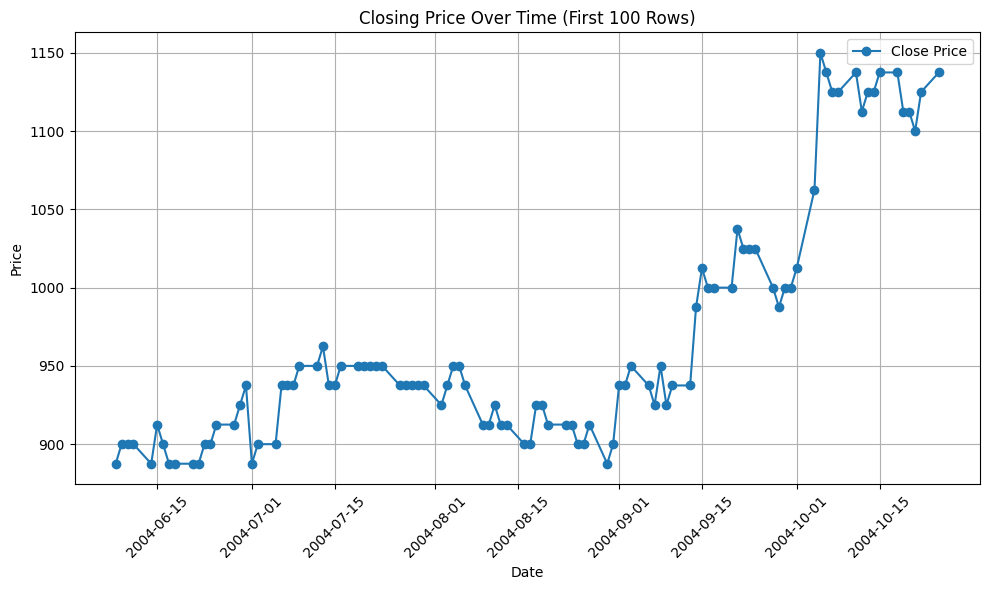

In [37]:
data_100['Date'] = pd.to_datetime(data_100['Date'])
plt.figure(figsize=(10, 6))
plt.plot(data_100['Date'], data_100['Close'], marker='o', label='Close Price')
plt.title('Closing Price Over Time (First 100 Rows)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Frequency Distribution of BBCA.JK Trading Volume

This option is clear and descriptive, specifying the stock ticker and the metric (volume).

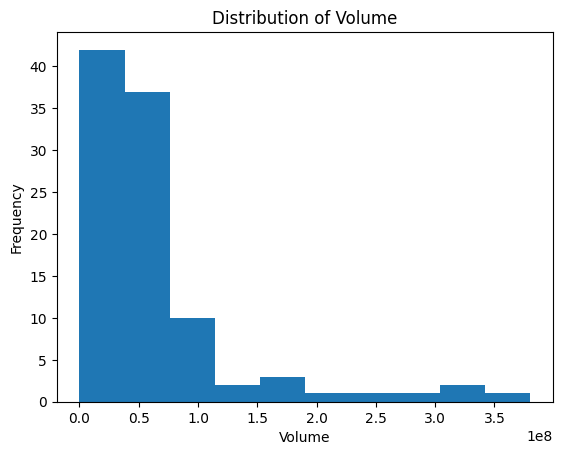

In [38]:
plt.hist(data_100['Volume'], bins=10)
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

# Relationship Between Opening and Closing Prices (BBCA.JK)

Clearly states the relationship being visualized and adds context.

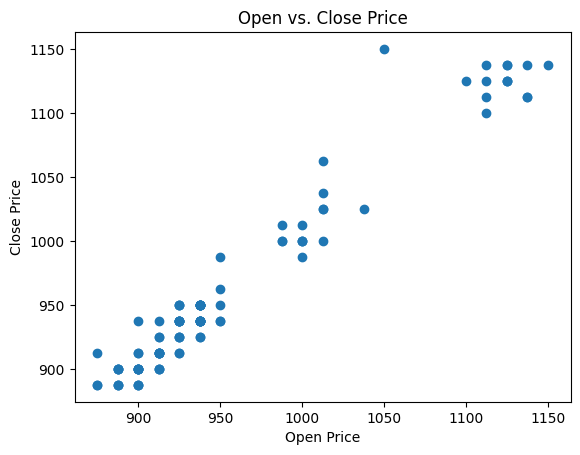

In [39]:
plt.scatter(data_100['Open'], data_100['Close'])
plt.title('Open vs. Close Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

# Correlation Matrix of BBCA.JK Stock Data

This option is clear and concise, stating the dataset being analyzed.


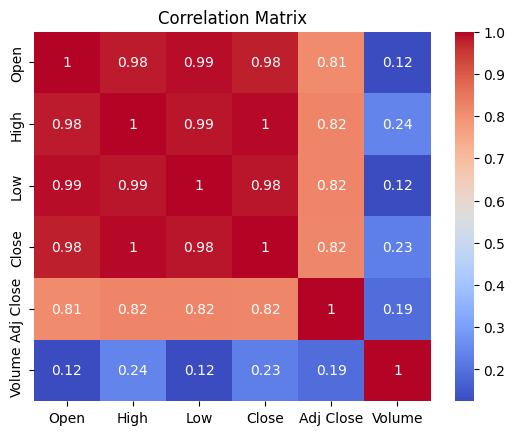

In [40]:
import seaborn as sns
corr_matrix = data_100.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Monthly Variation of BBCA.JK Closing Prices

Clearly states the stock ticker and the metric being visualized.

<ipython-input-41-4af6ed94710f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_100['Date'] = pd.to_datetime(data_100['Date'])
<ipython-input-41-4af6ed94710f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_100['Month'] = data_100['Date'].dt.month


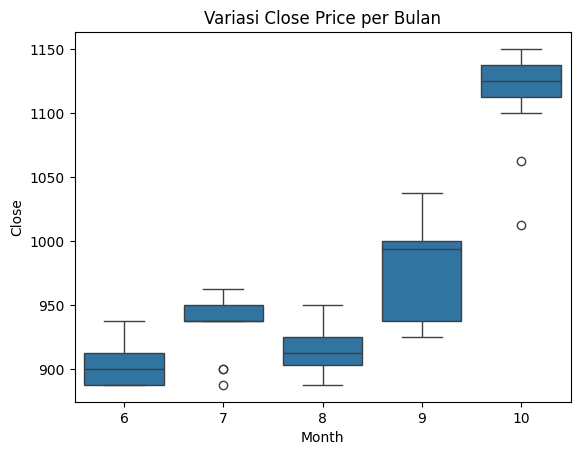

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data_100['Date'] = pd.to_datetime(data_100['Date'])

data_100['Month'] = data_100['Date'].dt.month

sns.boxplot(x='Month', y='Close', data=data_100)
plt.title('Variasi Close Price per Bulan')
plt.show()

# Feature Selection and Linear Regression for BBCA.JK Price Prediction

This option is clear and comprehensive, covering both key elements.

In [42]:
from sklearn.feature_selection import f_regression, SelectKBest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data_100 = pd.read_csv('BBCA.JK.csv')

X = data_100[['Open', 'High', 'Low', 'Volume']]
y = data_100['Close']

X = X.fillna(X.mean())
y = y.fillna(y.mean())

selector = SelectKBest(f_regression, k=3)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]

print("Selected Features:", selected_features)

X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features], y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Selected Features: Index(['Open', 'High', 'Low'], dtype='object')
Mean Squared Error: 12254.716210219609


# BBCA.JK Closing Prices (First 100 Days)

This option is clear, concise, and states the stock ticker and time frame.


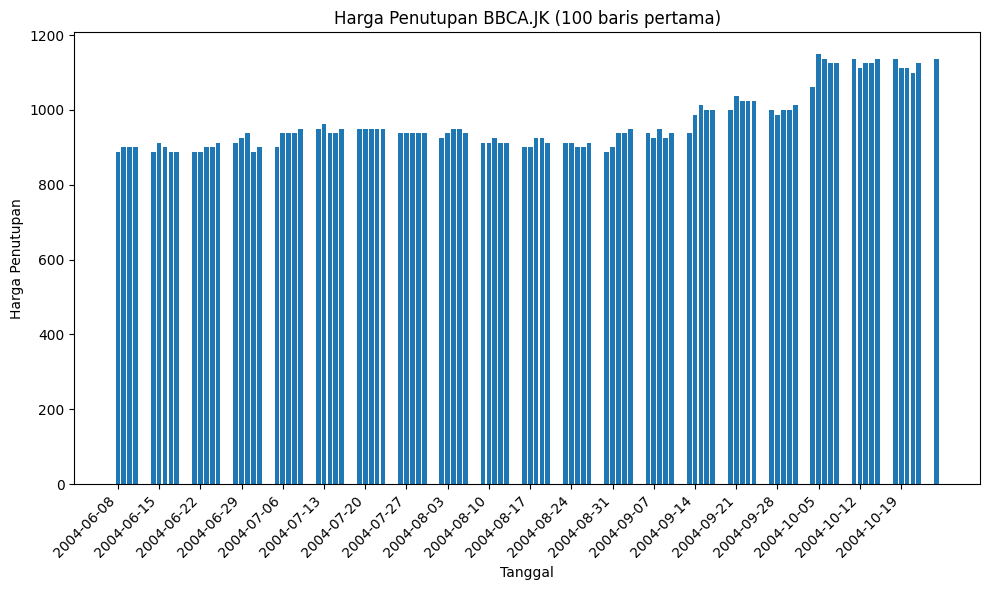

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data_100 = pd.read_csv('BBCA.JK.csv')

data_100['Date'] = pd.to_datetime(data_100['Date'])

data_100 = data_100.head(100)

plt.figure(figsize=(10, 6))
plt.bar(data_100['Date'], data_100['Close'])
plt.title('Harga Penutupan BBCA.JK (100 baris pertama)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.xticks(data_100['Date'][::5], data_100['Date'][::5].dt.strftime('%Y-%m-%d'), rotation=45, ha='right')
plt.tight_layout()
plt.show()